---
layout: default
title: "Machine learning diagnostic"
categories: evaluation
permalink: /ML17/
order: 17
comments: true
---

In [2]:
%pylab --no-import-all inline

import seaborn as sns
import pandas as pd
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Machine learning diagnostic

Suppose you have implemented a regularized linear regression to predict housing prices. So you have successfully minimized cost function $J(\theta)$

$$
J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta\left(x^{(i)}\right) - y^{(i)}\right)^2 + \lambda \sum_{j=1}^m \theta_j^2 \right]
$$

However, suppose that when you test your hypothesis, it makes unacceptably large errors in its predictions. What should you do next? 

There are a number of things that you could do to improve the algorithm:

* Get more training examples
* Try a smallers set of features to prevent overfitting
* Try getting additional features
* Try adding polynomial features
* Decreasing or increasing $\lambda$

In this chapter we will focus on **machine learning diagnostic**: a test that can be run to gain insight on what is or is not working with a learning algorithm.

## Evaluating an hypothesis

In the case of house prices if we want to see how our hypothesis is performing we could just plot it. Since we have just one feature (the area of each house) we can plot the feature against the price as in <a href="#linreghouseprice">Figure below</a>.

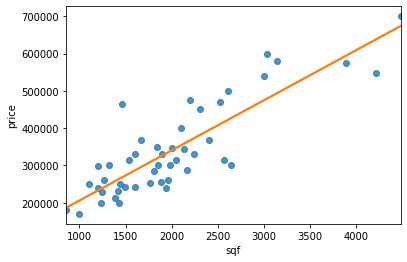

In [3]:
data = pd.read_csv('data/house_pricing.csv').drop('rooms', axis=1)
sns.regplot(data=data, x='sqf', y='price', ci=None, line_kws={'color': 'C1'});

<i id="linreghouseprice">Visual representation of a linear regression of house prices ($y$) based on the living surface in square foots ($x$)</i>

When we have many features it becomes impossible to plot hypotheses. How do we tell if our hypothesis is overfitting? The standard way to evaluate a training hypothesis is to split the training set in two randomly selected subsets. The first subset ($70\%$ of the examples) will be the **training set** and the second subset ($30\%$ of the examples) will be the **test set** (blue background).

In [4]:
color = lambda s: ['background-color: lightskyblue' if s.name > 6 else '' for val in s]
data.head(10).style.hide_index().apply(color, axis=1)

sqf,price
2104,399900
1600,329900
2400,369000
1416,232000
3000,539900
1985,299900
1534,314900
1427,198999
1380,212000
1494,242500


And we will differentiate the notation between test set and training set as follows:

Training set:

$$
\begin{align}
&\left(x^{(1)}, y^{(1)} \right)\\
&\left(x^{(2)}, y^{(2)} \right)\\ 
& \quad \;\; \vdots \\ 
&\left(x^{(m)}, y^{(m)} \right)
\end{align}
\label{eq:trainingdata} \tag{1}
$$

Test set:

$$
\begin{align}
&\left(x^{(1)}_{\text{test}}, y^{(1)}_{\text{test}} \right)\\
&\left(x^{(2)}_{\text{test}}, y^{(2)}_{\text{test}} \right)\\ 
& \quad \;\; \vdots \\ 
&\left(x^{(m_\text{test})}_{\text{test}}, y^{(m_\text{test})}_{\text{test}} \right)
\end{align}
\label{eq:testdata} \tag{2}
$$

So here's how you will proceed with these two subsets: 

1. Learn paramters $\theta$ from the training set (minimizing error $J(\theta)$)
2. Compute test set error $J_\text{test}(\theta)$

In logistic regression you can of course compute $J_\text{test}(\theta)$ or alternatively you could compute the **misclassification error** (also called 0/1 misclassification error to convey that you can either classify an example correctly or incorrectly).

$$
\begin{equation}
\text{err}(h_\theta(x), y)=
\begin{cases}\!% alignment adjustment
&1 \quad
  \begin{aligned}[t]% adjust case condition placement here, use [t]op, [b]ottom, or [c]enter (default)
    &\text{if } h_\theta(x) \geq 0.5, \; y=0\\ 
    &\text{or } h_\theta(x) < 0.5, \; y=1\\
  \end{aligned} \\ \\
&0 \quad \text{otherwise}
\end{cases}
\end{equation}
$$

$$
\text{Test Error} = \frac{1}{m_\text{test}} \sum^{m_\text{test}}_{i=1} \text{err} \left( h_\theta\left( x^{(i)}_\text{test} \right), y^{(i)}_\text{test} \right)
$$

## Model selection
This section regards model selection problems. In particular we will touch upon how o choose the polynomial features to include in an hypothesis and how to choose the regularization paramter $\lambda$. 

To do this we will split the data not only in training and test sets but in three subsets. The **training-set**, the **test-set** and the **validation-set**.

Let's say that you are trying to chose what degree polynomial to fit to the data. It is as if  in our algorithm there is an extra parameter $d$ to set that represents what degree of polynomial we want to use.

$$
\begin{align}
d=1 \to \; & h_\theta(x) = \theta_0+\theta_1x & \to \theta^{(1)}\\
d=2 \to \; & h_\theta(x) = \theta_0+\theta_1x+\theta_2x^2 & \to \theta^{(2)}\\
d=3 \to \; & h_\theta(x) = \theta_0+\theta_1x+\dots+\theta_3x^3 & \to \theta^{(3)}\\
&\vdots &\\
d=10 \to \; & h_\theta(x) = \theta_0+\theta_1x+\dots+\theta_{10}x^{10} & \to \theta^{(10)}\\
\end{align}
$$

You want to choose a model, fit the model and get an estimate of how well the fitted model generalize on new examples. In order to chose a model we could be tempted to calculate the test-set error for each model with parameter $d$ and fitted parameters $\theta^{(i)}$ and chose the model with the smallest $J_\text{test}(\theta)$.

$$
\begin{align}
\theta^{(1)} \to \; & J_\text{test}\left(\theta^{(1)}\right)\\
\theta^{(2)} \to \; & J_\text{test}\left(\theta^{(2)}\right)\\
\theta^{(3)} \to \; & J_\text{test}\left(\theta^{(3)}\right)\\
&\vdots \\
\theta^{(10)} \to \; & J_\text{test}\left(\theta^{(10)}\right)\\
\end{align}
$$

However, the chosen $J_\text{test}(\theta^{(i)})$ is very likely to be an optimistic estimate of the generalization error because we fit the parameter $d$ to the test-set so it will tend to perform better on the test than on a general case.

In order to resolve this issue we are going to split our dataset in three subsets: training-set, the cross validation-set (or CV, orange background) and the test set (blue background). Usually the training set will take around $60\%$ of your dataset and the test and cross-validation sets will take $20\%$ each.

In [5]:
def color(s):
    colors = []
    for val in s:
        c = ''
        if s.name > 5:
            c = 'background-color: bisque'
        if s.name > 7:
            c= 'background-color: lightskyblue'
        colors.append(c)
    return colors
data.head(10).style.hide_index().apply(color, axis=1)

sqf,price
2104,399900
1600,329900
2400,369000
1416,232000
3000,539900
1985,299900
1534,314900
1427,198999
1380,212000
1494,242500


And of course now, in addition to $\eqref{eq:trainingdata}$ and $\eqref{eq:testdata}$  we will have:


$$
\begin{align}
&\left(x^{(1)}_{\text{CV}}, y^{(1)}_{\text{CV}} \right)\\
&\left(x^{(2)}_{\text{CV}}, y^{(2)}_{\text{CV}} \right)\\ 
& \quad \;\; \vdots \\ 
&\left(x^{(m_{CV})}_{\text{CV}}, y^{(m_{CV})}_{\text{CV}} \right)
\end{align}
$$

And we can also define the errors for the three subsets.

Training error

$$
\begin{equation}
J_\text{train}(\theta) = \frac{1}{2m}\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right) - y^{(i)}\right)^2
\end{equation}
\label{eq:trainerr} \tag{3}
$$

Cross Validation error

$$
\begin{equation}
J_\text{CV}(\theta) = \frac{1}{2m_\text{CV}}\sum^{m_\text{CV}}_{i=1}\left(h_\theta\left(x_\text{CV}^{(i)}\right) - y_\text{CV}^{(i)}\right)^2
\end{equation}
\label{eq:crosserr} \tag{4}
$$

Test error

$$
\begin{equation}
J_\text{test}(\theta) = \frac{1}{2m_\text{test}}\sum^{m_\text{test}}_{i=1}\left(h_\theta\left(x_\text{test}^{(i)}\right) - y_\text{test}^{(i)}\right)^2
\end{equation}
\label{eq:testerr} \tag{5}
$$

And so before testing the generalization power of you algorithm on the test set you can select the model that produces $\min_\theta J(\theta)$ calculated on the Cross Validation set.

While it is ill advised to optimizize $J_\text{test}(\theta)$ and $J_\text{CV}(\theta)$ on the same subset (test set), sometimes you will encounter algorithms trained in such a way. If the test is very big this should not be a problem but othwerise you should also have separate test and cross-validation sets.

## Bias vs Variance
When a ML algorith is underperfoming with respect to expectations is almost always because of an **over-fitting** problem or **under-fitting** problem.

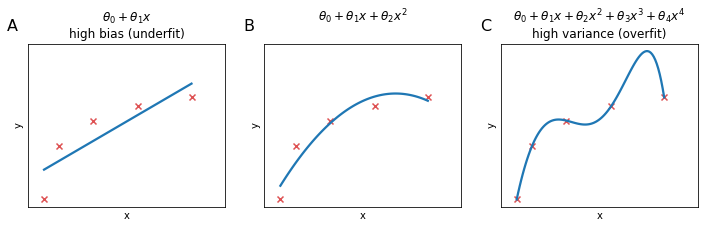

In [6]:
%%capture --no-stdout --no-display
jitter = np.random.rand(5)*0.1
x = np.linspace(0.1, 1, 5)**2+jitter
y = np.log(x)+jitter

fig, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
ax1, ax2, ax3 = axes
sns.regplot(x=x, y=y, ax=ax1, ci=None, scatter_kws=dict(color='C3'), marker='x')
ax1.set_title('$\\theta_0+\\theta_1x$\nhigh bias (underfit)')
sns.regplot(x=x, y=y, ax=ax2, ci=None, order=2, scatter_kws=dict(color='C3'), marker='x')
ax2.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2$\n')
sns.regplot(x=x, y=y, ax=ax3, ci=None, order=6, scatter_kws=dict(color='C3'), marker='x')
ax3.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2+\\theta_3x^3+\\theta_4x^4$\nhigh variance (overfit)')

for ax, label in zip(axes, ['A', 'B', 'C']):
    ax.text(-0.05, 1.15, label, transform=ax.transAxes,
      fontsize=16, va='top', ha='right')
    ax.set_xlim(-.1, 1.26)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks([])
    ax.set_yticks([])

<i id="polynomialregression">Visual representation of polynomial regression of grade 1 (A), grade 2 (B) and grade 3 (C)</i>

Let's say that training error and cross validation error are defined as in $\eqref{eq:trainerr}$ and $\eqref{eq:crosserr}$. If we plot $J_\text{train}(\theta)$ and $J_\text{CV}(\theta)$ as a function of the polynome degree $d$ we will see that $J_\text{train}(\theta)$ decrease at the increase of $d$, because we are able to fit the algorithm better and better; $J_\text{CV}(\theta)$ will be large for small values of $d$ indicating that we are underfitting the data, it will decrease at the increase of $d$ until reaching the minimum value for the optimal $d$ and raise again when further increasing $d$.

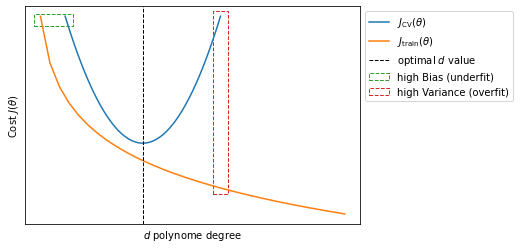

In [7]:
%%capture --no-display
xcross = np.linspace(-.5, .5)
xtrain = np.linspace(-1, 2)
jtrain = -np.log(xtrain)
jcross = 10*xcross ** 2
xcross -= .8
xtrain -= 1.5
jcross += .7
fig, ax = plt.subplots()
ax.plot(xcross, jcross, label='$J_\\mathrm{CV}(\\theta)$')
ax.plot(xtrain , jtrain, label='$J_\\mathrm{train}(\\theta)$')
ax.axvline(-.8, ls='--', c='k', lw=1, label='optimal $d$ value')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Cost $J(\\theta)$')
ax.set_xlabel('$d$ polynome degree')
ax.add_patch(matplotlib.patches.Rectangle((-1.5, 3), .25, .25, fill=False, ls='--', edgecolor='C2', label='high Bias (underfit)'))
ax.add_patch(matplotlib.patches.Rectangle((-.35, -.3), .1, 3.6, fill=False, ls='--', edgecolor='C3', label='high Variance (overfit)'))
_ = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

So we can generalize and deduce that when both $J_\text{train}(\theta)$ and $J_\text{CV}(\theta)$ are large we are in underfitting the algorithm (high bias); when $J_\text{CV}(\theta)$ is large but $J_\text{train}(\theta)$ is small we are underfitting the algorithm (high variance).

### Effect of regularization of Bias/Variance
The regularization parameter $\lambda$ also has an effect on the bias/variance trade-off. To chose the right value of $\lambda$ we can adopt a similar strategy to that adopted in the previous section: with 

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m\left(h_\theta\left( x ^{(i)}\right) -y^{(i)} \right)^2 + \frac{\lambda}{2m}\sum_{j=1}^m\theta_j^2
$$

we can try different valus of $\lambda$ 

$$
\Lambda = 
\begin{bmatrix}
0\\0.01\\0.02\\0.04\\ 0.08 \\ \vdots \\10
\end{bmatrix} \quad \to \quad
\begin{bmatrix}
\theta^{(1)}\\ \theta^{(2)}\\ \theta^{(3)}\\ \theta^{(4)}\\ \theta^{(5)} \\ \vdots \\ \theta^{(l)}
\end{bmatrix} = \Theta
$$

We will then calculate $\min_\theta J(\theta)$ for each $\lambda^{(i)}$ to obtain a set of prameters $\theta^{(i)}$. We will then use the set of parameters $\theta^{(i)}$ to calculate $J_\text{CV}\left(\theta^{(i)}\right)$ and select the model that staisfy $\min_{\theta^{(i)}} J_\text{CV}(\Theta)$. Finally we can calculate $J_\text{test}\left(\theta^{(i)}\right)$ with the $\theta^{(i)}$ that minimizes $J_\text{CV}\left(\theta^{(i)}\right)$.

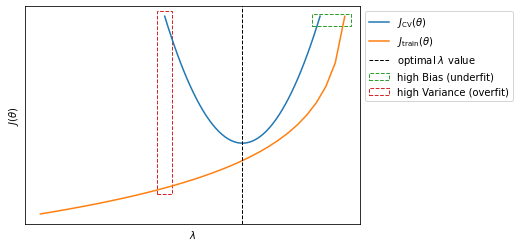

In [8]:
%%capture --no-display
xcross = np.linspace(-.5, .5)
xtrain = np.linspace(-1, 2)
jtrain = -np.log(xtrain)
jcross = 10*xcross ** 2
xcross -= .8
xtrain -= 1.1
jcross += .7
fig, ax = plt.subplots()
ax.plot(xcross, jcross, label='$J_\\mathrm{CV}(\\theta)$')
ax.plot(xtrain , jtrain[::-1], label='$J_\\mathrm{train}(\\theta)$')
ax.axvline(-.8, ls='--', c='k', lw=1, label='optimal $\\lambda$ value')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('$J(\\theta)$')
ax.set_xlabel('$\\lambda$')
ax.add_patch(matplotlib.patches.Rectangle((-.35, 3), .25, .25, fill=False, ls='--', edgecolor='C2', label='high Bias (underfit)'))
ax.add_patch(matplotlib.patches.Rectangle((-1.35, -.3), .1, 3.6, fill=False, ls='--', edgecolor='C3', label='high Variance (overfit)'))
_ = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Learning curves

Learning curves are often useful tools to explore the performance of your learning algorithm and to diagnose high bias/variance problems. Given $\eqref{eq:trainerr}$ and $\eqref{eq:crosserr}$, learning curves plot the effect of $m$ on $J_\text{train}(\theta)$ and $J_\text{CV}(\theta)$. This effect is achieved by articificially limit the number of examples availables $m$.

* When the algorithm is not over- or under-fitting (A), $J_\text{train}(\theta)$ will increase with $m$ while $J_\text{CV}(\theta)$ will decrease when $m$ increases;
* If the algorithm suffers from high bias (underfitting) (B), $J_\text{CV}(\theta)$ will behave more or less like in (A), decreasing at the increase of $m$ but $J_\text{train}(\theta) \approx J_\text{CV}(\theta)$ for large values of $m$. This has one important implication: when your algorithm suffer from high bias, increasing the number of examples $m$ will not be helpful;
* If the algorith suffers from high variance (overfitting) (C), $J_\text{train}(\theta)$ will increase with $m$ and $J_\text{CV}(\theta)$ will decrease at the increase of $m$ but at a much slower rate, so that the values there will always be a large gap between the values of $J_\text{train}(\theta)$ and $J_\text{CV}(\theta)$.

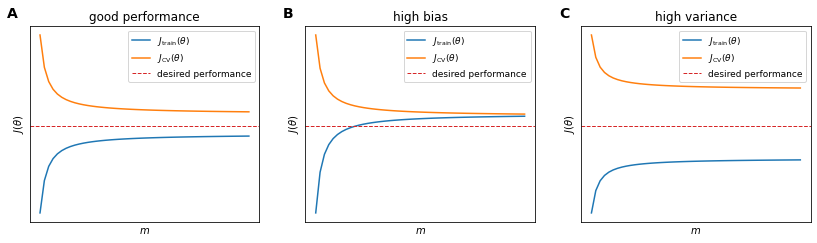

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3.6))

[ax1, ax2, ax3] = axes
m = np.arange(1, 50)
jt = (np.pi)*np.arctan(m)
jc = -(np.pi)*np.arctan(m)
ax1.plot(m, jt-10.5, label='$J_\mathrm{train}(\\theta)$')
ax1.plot(m, jc, label='$J_\mathrm{CV}(\\theta)$')
ax1.set_title('good performance')
ax1.axhline(-5.3, c='C3', ls='--', lw=1, label='desired performance')
ax2.plot(m, 1.1*jt-9.8, label='$J_\mathrm{train}(\\theta)$')
ax2.plot(m, .9*jc, label='$J_\mathrm{CV}(\\theta)$')
ax2.set_title('high bias')
ax2.axhline(-4.7, c='C3', ls='--', lw=1, label='desired performance')
ax3.plot(m, jt-13, label='$J_\mathrm{train}(\\theta)$')
ax3.plot(m, jc, label='$J_\mathrm{CV}(\\theta)$')
ax3.axhline(-6.6, c='C3', ls='--', lw=1, label='desired performance')
ax3.set_title('high variance')
for ax, l in zip(axes, 'ABC'):
    ax.text(-.05, 1.1, l, transform=ax.transAxes, va='top', ha='right', fontsize=14, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$m$')
    ax.set_ylabel('$J(\\theta)$')
    ax.legend(loc='upper right', fontsize=9);

However it is important to notice that for the high variance case (C), for very large values of $m$, $J_\text{train}(\theta)$ will finally decrease and converge towards $J_\text{CV}(\theta)$. In this case (overfitting) having more training examples $m$ will help reduce the problem.

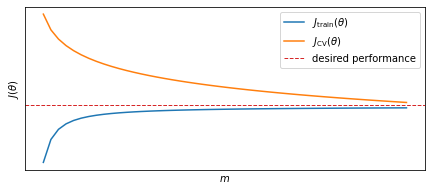

In [10]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_aspect(3)
m = np.arange(1, 50)
jt = (np.pi)*np.arctan(m)
jc = -np.log(m)
ax.plot(m, jt-9, label='$J_\mathrm{train}(\\theta)$')
ax.plot(m, jc, label='$J_\mathrm{CV}(\\theta)$')
ax.axhline(-4, c='C3', ls='--', lw=1, label='desired performance')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$m$')
ax.set_ylabel('$J(\\theta)$')
ax.legend();

## Diagnose learning algorihtm
We can summarize this whole section with a series of reccomendations to follow if your learning algorithm has unacceptably large errors on new examples:

* Get more training examples $\quad \to \quad$ fixes high variance
* Try a smaller set of features $\quad \to \quad$ fixes high variance
* Try getting additional features $\quad \to \quad$ fixes high bias
* Try adding polynomial features $\quad \to \quad$ fixes high bias
* Try decreasing $\lambda \quad \to \quad$ fixes high bias
* Try increasing $\lambda \quad \to \quad$ fixes high variance

Until now, when talking about a learning algorithm, we always refererred to a regularized linear regression. 

But we can try to apply what we have learned to neural networks: small neural networks have fewer parameters and are more prone to underfitting but in contrast they are computationally cheaper.

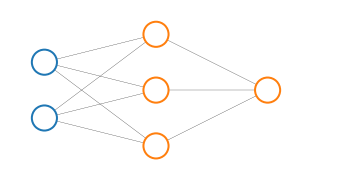

In [11]:
ax, *_ = ann([2, 3, 1], width=2, radius=1.5, node_colors=True, node_lw=2)
ax.set_aspect('equal')

Large neural networks on the other hand (with more hidden units or more hidden layers) are more prone to overfitting and, as a secondary and maybe marginal problem, they tend to be more computationally expensive. In this case we can use regularization $\lambda$ to address overfitting.

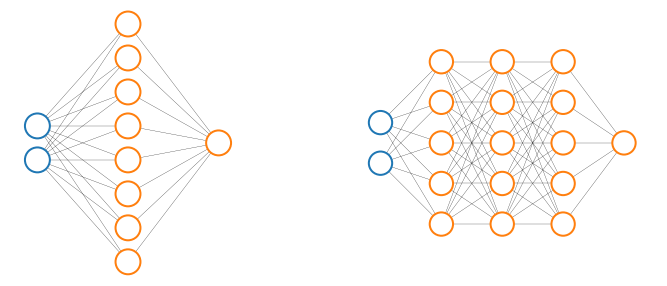

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axes
ann([2, 8, 1], node_colors=True, ax=ax1, radius=2, node_lw=2)
ann([2, 5, 5, 5, 1], node_colors=True, ax=ax2, radius=2.3, width=1.5, node_lw=2)
for ax, l in zip(axes, 'AB'):
    ax.set_aspect('equal')

Finding the right number of hidden layers can be also achieved empirically by trying to explore the performance of neural networks with different number of hidden layers and chose the one that minimizes $\eqref{eq:crosserr}$